<a href="https://colab.research.google.com/github/Pranatha-Rao/Advance-Data-Science/blob/master/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***MACHINE LEARNING MODELS***

## ***Introduction***

**World Health Organization** has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk.



In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Upload the dataset to Google colab
from google.colab import files 
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset.csv


## **About the dataset:** 

***Columns description***

**Sex:** male or female(Nominal)

**Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

**Current Smoker:** whether or not the patient is a current smoker (Nominal)

**Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

**BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

**Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

**Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

**Diabetes:** whether or not the patient had diabetes (Nominal) Medical(current)

**Tot Chol:** total cholesterol level (Continuous)

**Sys BP:** systolic blood pressure (Continuous)

**Dia BP:** diastolic blood pressure (Continuous)

**BMI:** Body Mass Index (Continuous)

**Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

**Glucose:** glucose level (Continuous) Predict variable (desired target)

**10 year risk of coronary heart disease CHD** binary: “1”, means “Yes”, “0” means “No”

In [ ]:
import io 

#Read csv file
heart_df = pd.read_csv(io.BytesIO(uploaded['heart_disease_dataset.csv'])) 
print(heart_df)

      male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]


## ***Exploratory Data Analysis***

Using ***pandas_profiling library*** to understand the data.

It gives much more useful informations like % of mising values, mean, maximum, minimum, heatmap depicting correlation, etc.

In [ ]:
#Renaming the column name
heart_df.rename(columns={'male':'Sex'},inplace=True)

heart_df.head()

Sex  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0    1   39        4.0              0  ...  26.97       80.0     77.0           0
1    0   46        2.0              0  ...  28.73       95.0     76.0           0
2    1   48        1.0              1  ...  25.34       75.0     70.0           0
3    0   61        3.0              1  ...  28.58       65.0    103.0           1
4    0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]

In [ ]:
 #Installing pandas-profiling
 !pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 604kB 7.6MB/s 
     |████████████████████████████████| 3.1MB 7.1MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 296kB 20.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=45a47db348d6596b8a31c0ab09b0585a3fa646f2e72a9a5d7c6824a201559708
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=ea11b9eea571b60e68d4c38017fcf63e033f3cdd8657a3bf01258c29d8b814a9
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Unin

In [ ]:
import pandas_profiling
heart_df.profile_report()

## ***Conclusions-***

The data contains **4238 rows and 16 columns.**

Seems like this data is already preprocessed as there is no categorical columns. Those features have been encoded already. 

Columns having mising values are: **'education'(2.5%), 'cigsPerDay'(0.7%), 'BPMeds'(1.3%), 'totChol'(1.2%) and 'glucose'(9.2%).** 

Except the feature** glucose** all other missing values are less than 2% of data.

Using **SimpleImputer** to impute missing values with most frequent value, later in the notebook. 

## ***Performing visulization for analyzing the data***

Here are some plots for better understanding of the dataset.


Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


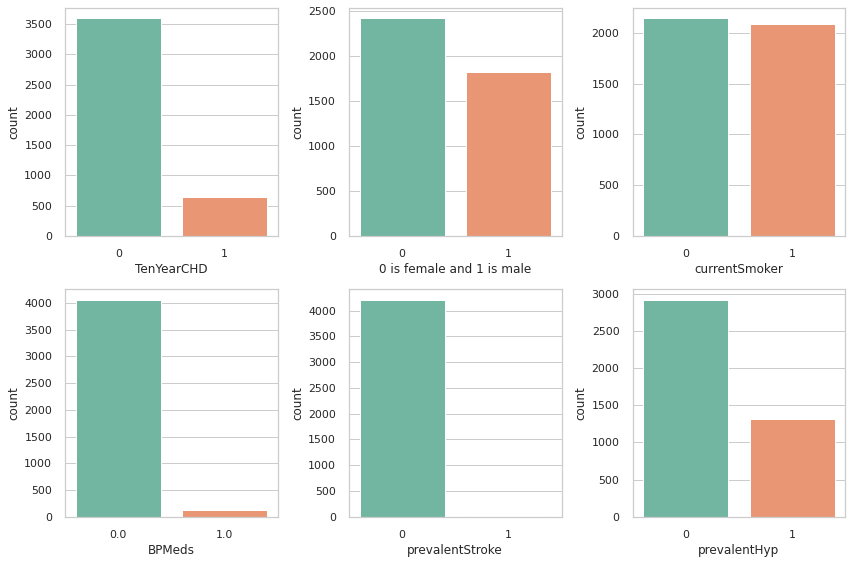

In [ ]:
sns.set(style="whitegrid",palette='Set2')

#Distribution of boolean variables
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')

fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(heart_df.TenYearCHD,ax=axes[0,0])
sns.countplot(heart_df.Sex,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(heart_df.currentSmoker,ax=axes[0,2])
sns.countplot(heart_df.BPMeds,ax=axes[1,0])
sns.countplot(heart_df.prevalentStroke,ax=axes[1,1])
sns.countplot(heart_df.prevalentHyp,ax=axes[1,2])

plt.tight_layout()

Distribution of continuous variables


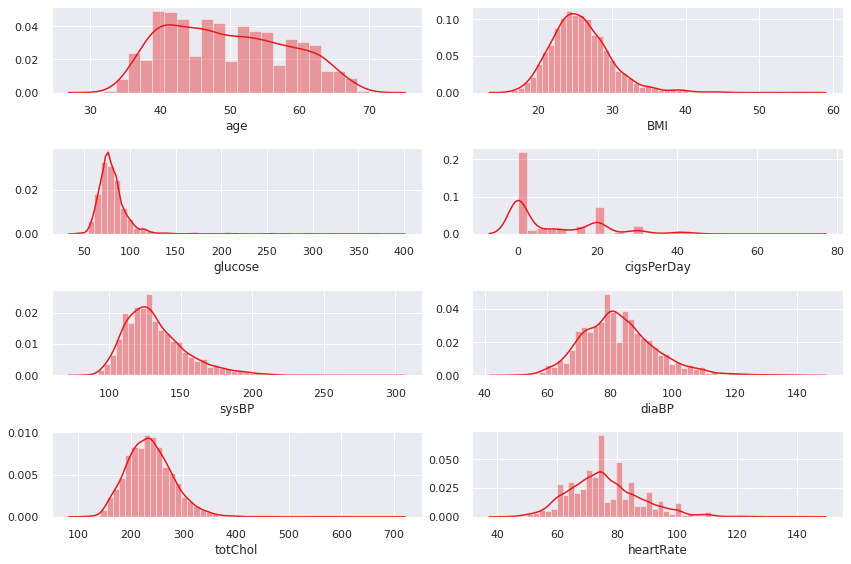

In [ ]:
sns.set(style="darkgrid",palette='Set1')

#Distribution of continuous variables
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))

sns.distplot(heart_df.age,ax=axes[0,0])
sns.distplot(heart_df.BMI,ax=axes[0,1])
sns.distplot(heart_df.glucose,ax=axes[1,0])
sns.distplot(heart_df.cigsPerDay,ax=axes[1,1])
sns.distplot(heart_df.sysBP,ax=axes[2,0])
sns.distplot(heart_df.diaBP,ax=axes[2,1])
sns.distplot(heart_df.totChol,ax=axes[3,0])
sns.distplot(heart_df.heartRate,ax=axes[3,1])

plt.tight_layout()

**Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose**

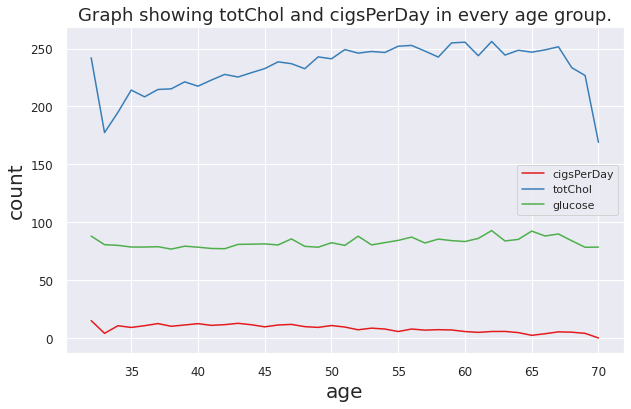

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.
graph_3 = heart_df.groupby("age").cigsPerDay.mean()
graph_4 = heart_df.groupby("age").totChol.mean()
graph_5 = heart_df.groupby("age").glucose.mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=graph_3, label="cigsPerDay")
sns.lineplot(data=graph_4, label="totChol")
sns.lineplot(data=graph_5, label="glucose")

plt.title("Graph showing totChol and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

**Plotting a bar graph to show whcih age group has more smokers**

Text(0.5, 1.0, 'Graph showing which age group has more smokers.')

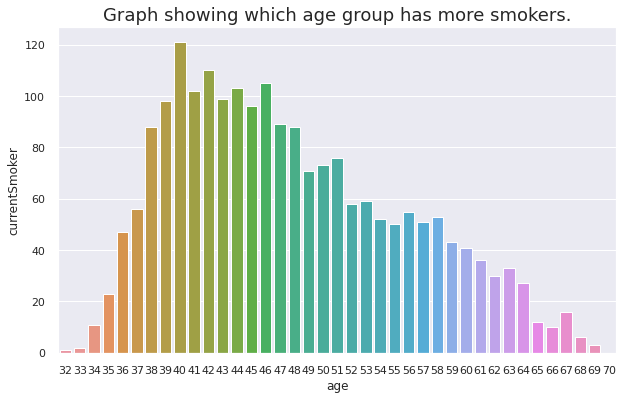

In [ ]:
graph = heart_df.groupby("age",as_index=False).currentSmoker.sum()

plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["currentSmoker"])

plt.title("Graph showing which age group has more smokers.",{'fontsize':18})

## **Handling missing data**

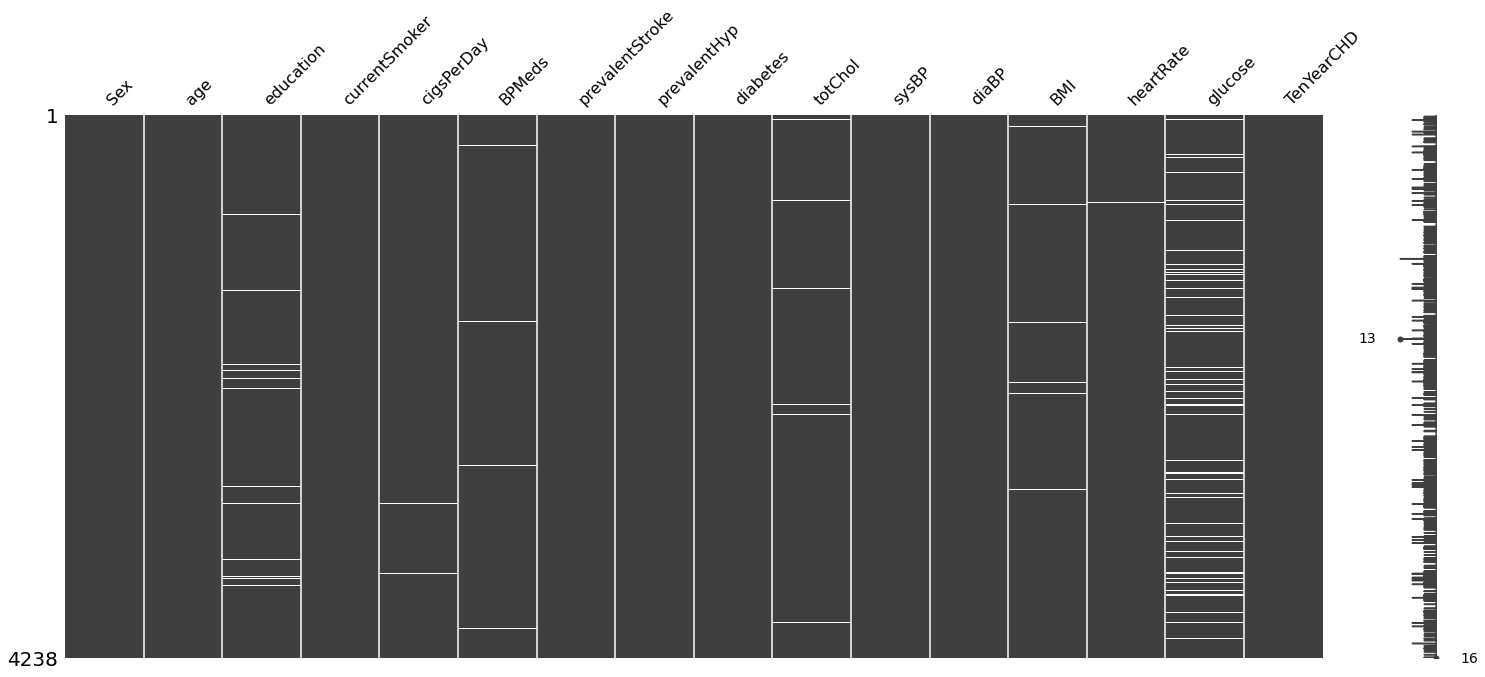

In [ ]:
# Visual look at missing data
msno.matrix(heart_df);

As for feature glucose, in heatmap that glucose is highly correlated with diabetes. So, feature diabetes is used to fill missing values in glucose.

In [ ]:
# Finding mean of glucose level for people with and without diabetes which is represented by 0 and 1
heart_df.groupby('diabetes').mean()['glucose']

diabetes
0     79.489186
1    170.333333
Name: glucose, dtype: float64

In [ ]:
#Using SimpleImputer to fill in missing values
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]

    #For missing glucose values
    if pd.isnull(glu):
        # If diabetes is 0 return 79
        if dia == 0:
            return 79
        # If diabetes is 1 return 170
        else:
            return 170
    else:
        return glu

heart_df['glucose'] = heart_df[['diabetes','glucose']].apply(impute_glucose,axis=1)

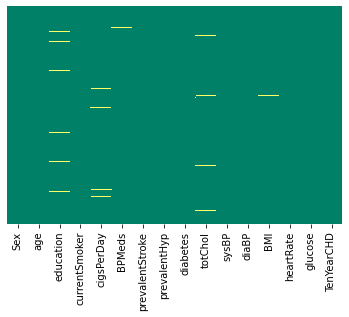

In [ ]:
#Another way to visualize missing data
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=False,cmap='summer')

From above visulization, it is clear that there is no missing values for glucode after using SimpleImputer to fill missing values. 

## ***Filling NaN values ***

Filling NaN values for continous variables by mean method and for categorical variables by median method.

In [ ]:
heart_df[['age','education','BPMeds','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = heart_df[['age','education',
                                                                                                                      'BPMeds','cigsPerDay',
                                                                                                      'totChol','sysBP','diaBP','BMI',
                                                                                                      'heartRate',
                                                                                                      'glucose']].fillna((heart_df[['age','education',
                                                                                                                                    'BPMeds','cigsPerDay',
                                                                                                                                    'totChol',
                                                                                                                                    'sysBP','diaBP','BMI','heartRate',
                                                                                                                                    'glucose']].mean()))
                                                                                                      
                                                                                                                                                                              
                                                                                                      
heart_df[['Sex','currentSmoker','prevalentStroke','prevalentHyp','diabetes']] = heart_df[['Sex','currentSmoker',
                                                                                           'prevalentStroke','prevalentHyp',
                                                                                           'diabetes']].fillna((heart_df[['Sex','currentSmoker',
                                                                                                                          'prevalentStroke','prevalentHyp','diabetes']]))

                                                                                                                                                           
                                                                                                                                                                                  
heart_df

Sex  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0       1   39        4.0              0  ...  26.97       80.0     77.0           0
1       0   46        2.0              0  ...  28.73       95.0     76.0           0
2       1   48        1.0              1  ...  25.34       75.0     70.0           0
3       0   61        3.0              1  ...  28.58       65.0    103.0           1
4       0   46        3.0              1  ...  23.10       85.0     85.0           0
...   ...  ...        ...            ...  ...    ...        ...      ...         ...
4233    1   50        1.0              1  ...  25.97       66.0     86.0           1
4234    1   51        3.0              1  ...  19.71       65.0     68.0           0
4235    0   48        2.0              1  ...  22.00       84.0     86.0           0
4236    0   44        1.0              1  ...  19.16       86.0     79.0           0
4237    0   52        2.0              0  ...  21.47       80.0    107.0           0

[4238 rows x 16 columns]

To check if all the missing values are gone


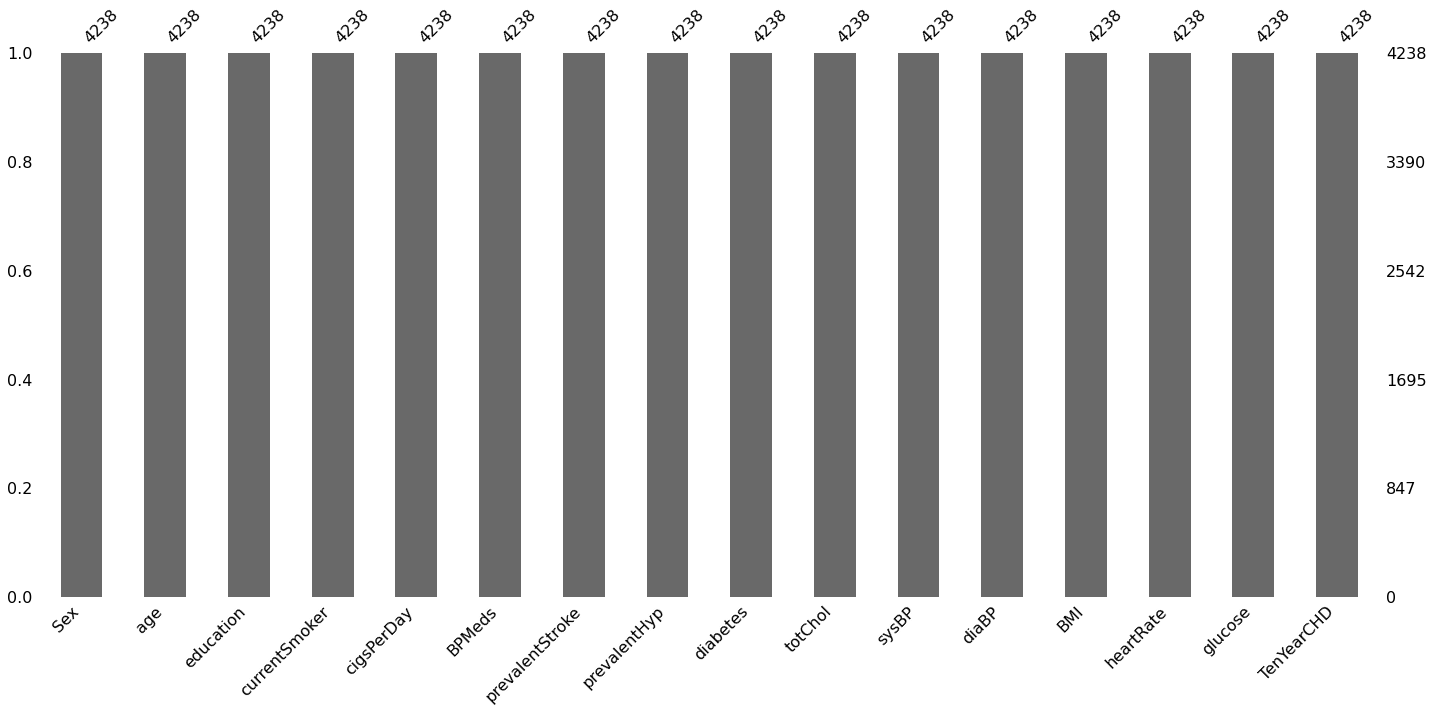

In [ ]:
print("To check if all the missing values are gone")
msno.bar(heart_df);

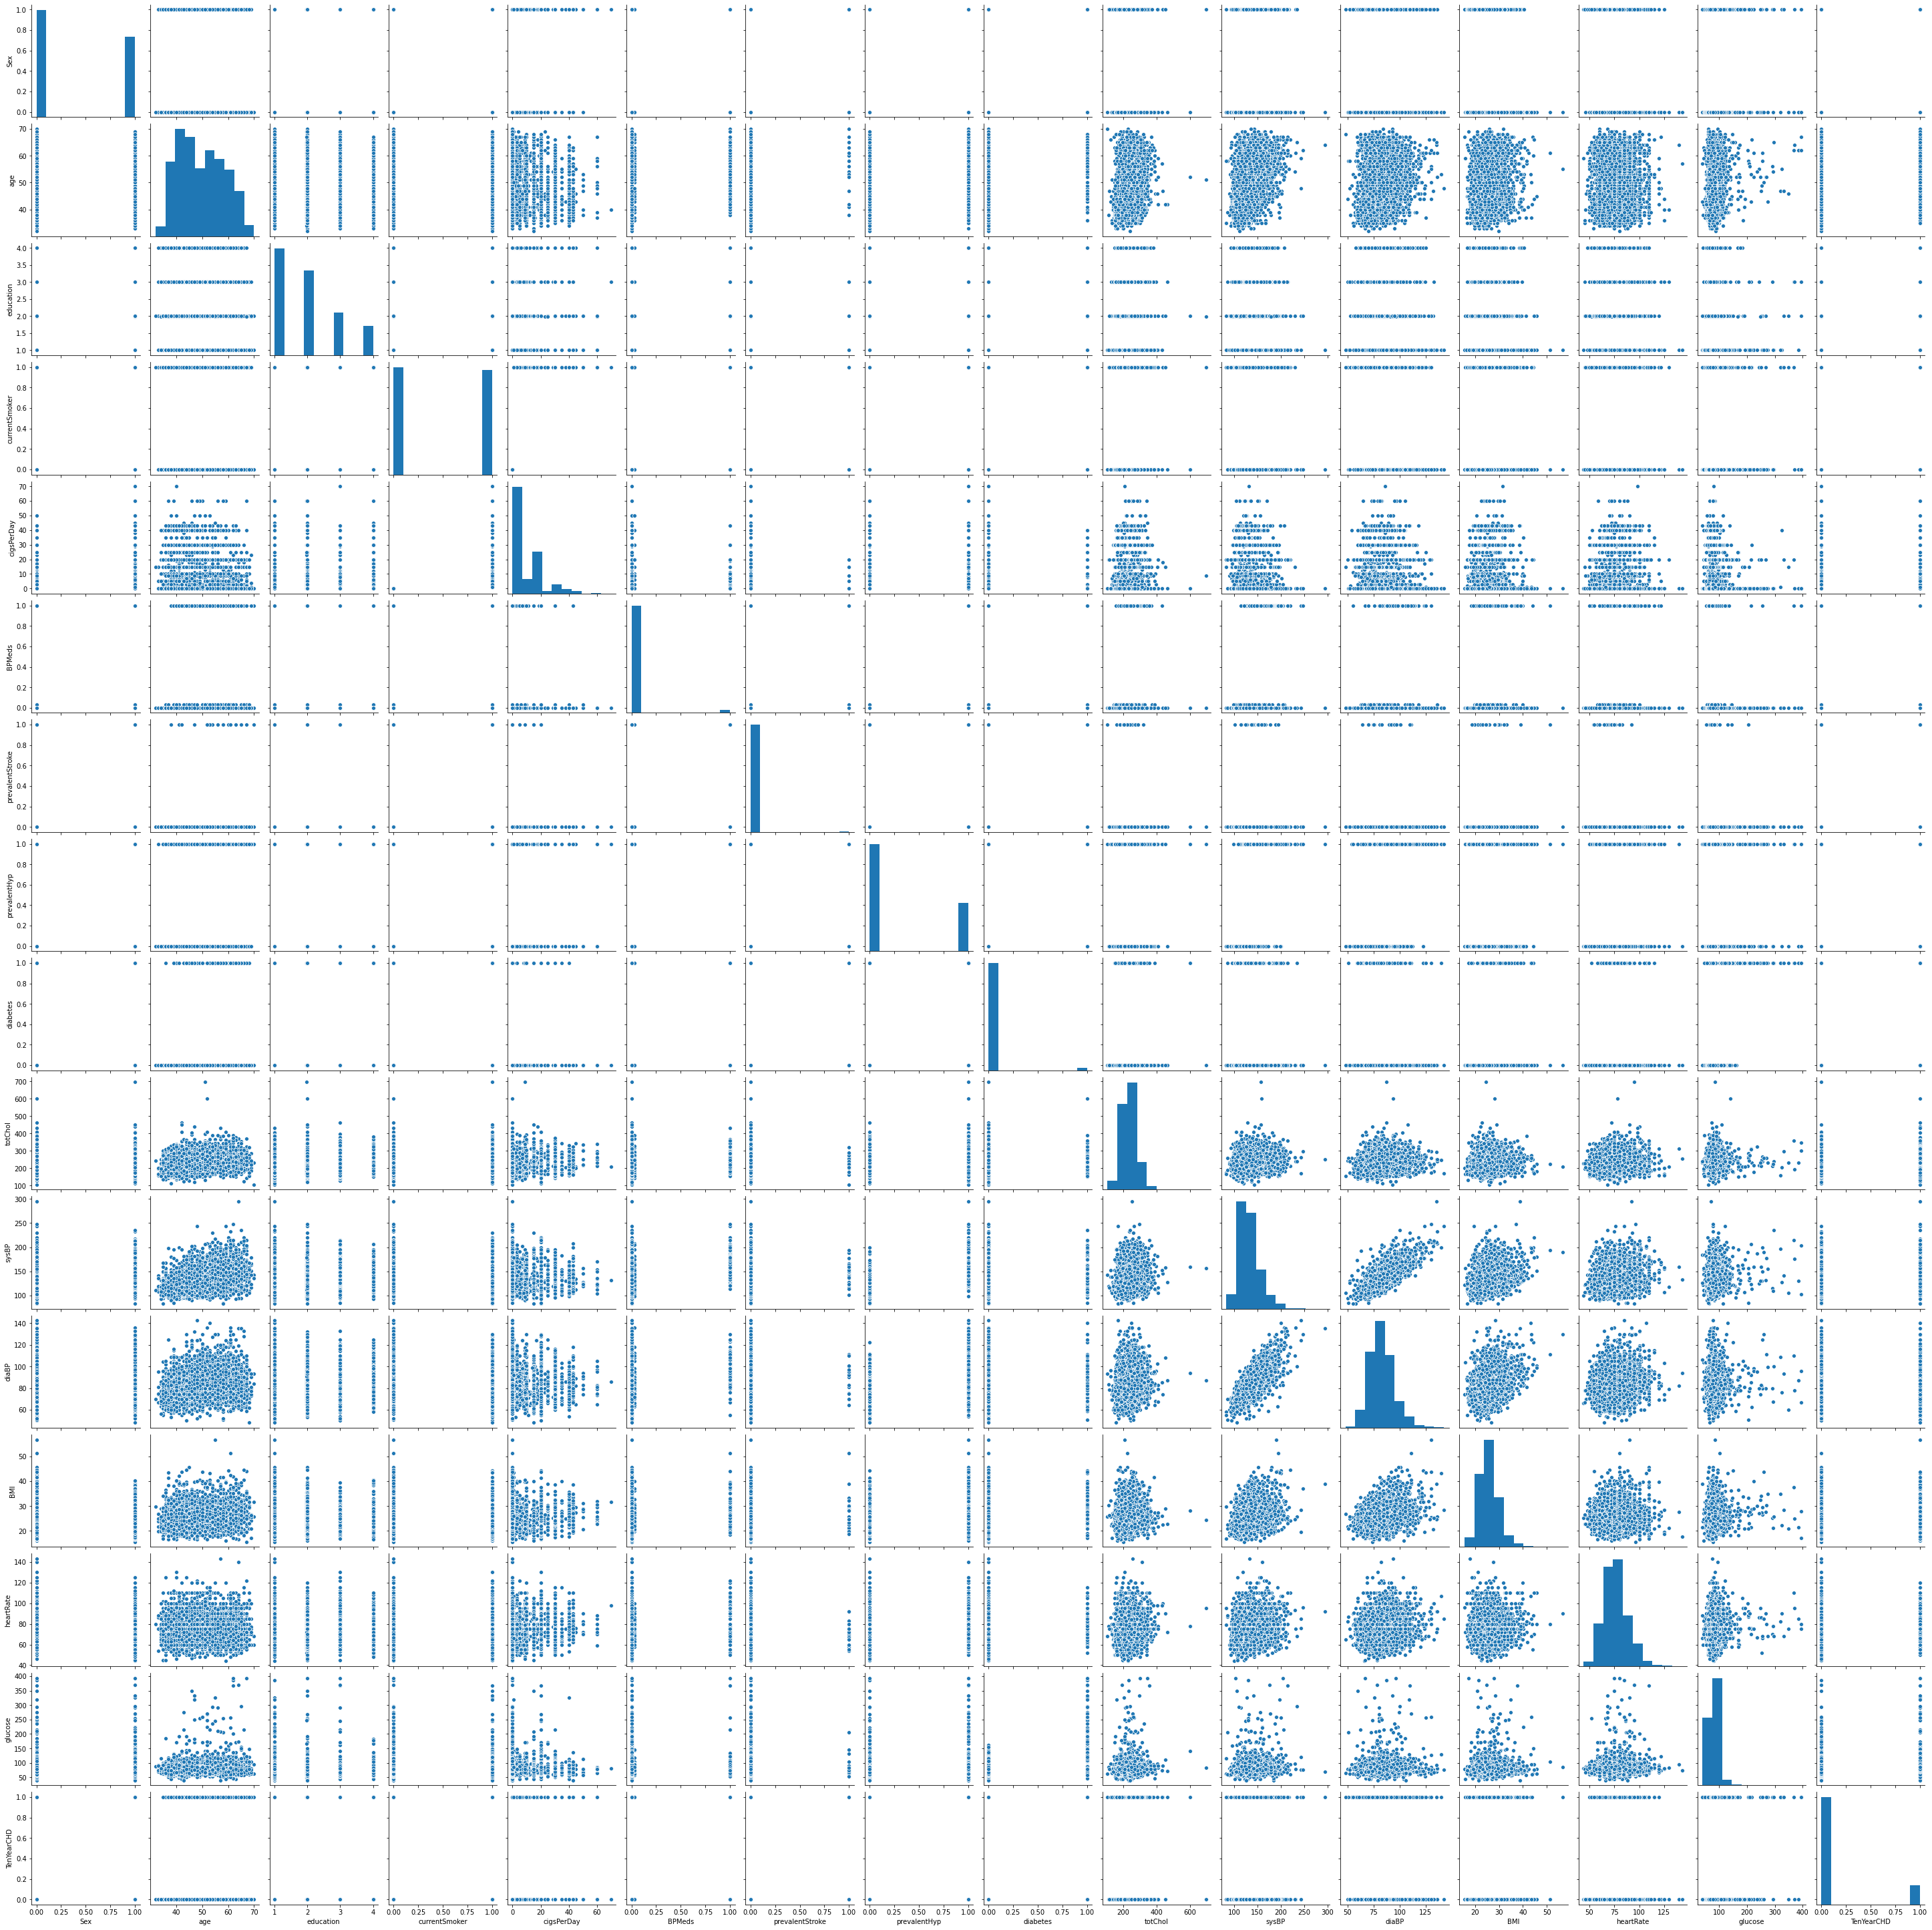

In [ ]:
# To check for multi-collinearity
heart_df.describe()
sns.pairplot(heart_df)

## ***Is there any multi-collinearity in the model?***

Yes there is a multi - collinearity between two independent variables - sysBP and diaBP, this can be confirmed from the Coorelation heat map and table above.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_heart = pd.DataFrame(scaler.fit_transform(heart_df[['Sex','age','cigsPerDay','prevalentHyp','totChol','diabetes','sysBP','diaBP','BPMeds',
                                                          'glucose','prevalentStroke','BMI','education','heartRate','currentSmoker']]))
scaled_heart

0         1         2    3   ...        11        12        13   14
0     1.0  0.184211  0.000000  0.0  ...  0.277024  1.000000  0.363636  0.0
1     0.0  0.368421  0.000000  0.0  ...  0.319680  0.333333  0.515152  0.0
2     1.0  0.421053  0.285714  0.0  ...  0.237518  0.000000  0.313131  1.0
3     0.0  0.763158  0.428571  1.0  ...  0.316045  0.666667  0.212121  1.0
4     0.0  0.368421  0.328571  0.0  ...  0.183228  0.666667  0.414141  1.0
...   ...       ...       ...  ...  ...       ...       ...       ...  ...
4233  1.0  0.473684  0.014286  1.0  ...  0.252787  0.000000  0.222222  1.0
4234  1.0  0.500000  0.614286  0.0  ...  0.101066  0.666667  0.212121  1.0
4235  0.0  0.421053  0.285714  0.0  ...  0.156568  0.333333  0.404040  1.0
4236  0.0  0.315789  0.214286  0.0  ...  0.087736  0.000000  0.424242  1.0
4237  0.0  0.526316  0.000000  0.0  ...  0.143723  0.333333  0.363636  0.0

[4238 rows x 15 columns]

In [ ]:
#Renaming columns
scaled_heart = scaled_heart.rename(columns= {0:"Sex", 1:"age", 2:"education", 3:"currentSmoker", 4:"cigsPerDay", 5:"BPMeds",
                                          6:"prevalentStroke",7:"prevalentHyp", 8:"diabetes", 9:"totChol", 10:"sysBP", 11:"diaBP", 12:"BMI", 13:"heartRate",
                                          14:"glucose"})

#Converting data type of categorical variables to integer type
scaled_heart = scaled_heart.astype({"Sex":'int', "currentSmoker":'int', "BPMeds":'int',"diabetes":'int',"sysBP":'int',"glucose":'int'})
scaled_heart.head()

Sex       age  education  ...       BMI  heartRate  glucose
0    1  0.184211   0.000000  ...  1.000000   0.363636        0
1    0  0.368421   0.000000  ...  0.333333   0.515152        0
2    1  0.421053   0.285714  ...  0.000000   0.313131        1
3    0  0.763158   0.428571  ...  0.666667   0.212121        1
4    0  0.368421   0.328571  ...  0.666667   0.414141        1

[5 rows x 15 columns]

In [ ]:
#Concatenate the dataframes for building the model
scale_heart = pd.concat([scaled_heart, heart_df['TenYearCHD']],axis =1)
scale_heart.head()

Sex       age  education  ...  heartRate  glucose  TenYearCHD
0    1  0.184211   0.000000  ...   0.363636        0           0
1    0  0.368421   0.000000  ...   0.515152        0           0
2    1  0.421053   0.285714  ...   0.313131        1           0
3    0  0.763158   0.428571  ...   0.212121        1           1
4    0  0.368421   0.328571  ...   0.414141        1           0

[5 rows x 16 columns]

In [ ]:
scale_heart.corr()

Sex       age  education  ...  heartRate   glucose  TenYearCHD
Sex              1.000000 -0.028979   0.316807  ...  -0.116601  0.197596    0.088428
age             -0.028979  1.000000  -0.192366  ...  -0.012819 -0.213748    0.225256
education        0.316807 -0.192366   1.000000  ...   0.074851  0.766970    0.057775
currentSmoker    0.005313  0.307194  -0.065947  ...   0.147222 -0.103260    0.177603
cigsPerDay      -0.069974  0.260270  -0.026025  ...   0.090676 -0.046285    0.081624
BPMeds           0.015708  0.101258  -0.037063  ...   0.048993 -0.044295    0.097317
prevalentStroke -0.035989  0.394302  -0.088505  ...   0.182174 -0.130230    0.216429
prevalentHyp     0.057933  0.206104  -0.056391  ...   0.181246 -0.107746    0.145299
diabetes        -0.051545  0.120955  -0.045663  ...   0.015139 -0.048358    0.086417
totChol          0.007589  0.115200  -0.054488  ...   0.084561 -0.052640    0.123863
sysBP           -0.004546  0.057655  -0.032706  ...  -0.017676 -0.032988    0.061810
diaBP            0.081506  0.135283  -0.092453  ...   0.067544 -0.167276    0.074680
BMI              0.017126 -0.163613   0.007962  ...  -0.053626  0.018301   -0.053384
heartRate       -0.116601 -0.012819   0.074851  ...   1.000000  0.062348    0.022898
glucose          0.197596 -0.213748   0.766970  ...   0.062348  1.000000    0.019456
TenYearCHD       0.088428  0.225256   0.057775  ...   0.022898  0.019456    1.000000

[16 rows x 16 columns]

In [ ]:
scale_heart

Sex       age  education  ...  heartRate  glucose  TenYearCHD
0       1  0.184211   0.000000  ...   0.363636        0           0
1       0  0.368421   0.000000  ...   0.515152        0           0
2       1  0.421053   0.285714  ...   0.313131        1           0
3       0  0.763158   0.428571  ...   0.212121        1           1
4       0  0.368421   0.328571  ...   0.414141        1           0
...   ...       ...        ...  ...        ...      ...         ...
4233    1  0.473684   0.014286  ...   0.222222        1           1
4234    1  0.500000   0.614286  ...   0.212121        1           0
4235    0  0.421053   0.285714  ...   0.404040        1           0
4236    0  0.315789   0.214286  ...   0.424242        1           0
4237    0  0.526316   0.000000  ...   0.363636        0           0

[4238 rows x 16 columns]

In [ ]:
scale_heart[['Sex','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke',
                    'prevalentHyp','diabetes','totChol','sysBP',
                                                               'diaBP','BMI','heartRate','glucose']]

scale_heart['TenYearCHD']

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [ ]:
                                                                           
imputed_heart_model = sm.Logit(scale_heart['TenYearCHD'], scale_heart[['Sex','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke',
                                                               'prevalentHyp','diabetes','totChol','sysBP',
                                                               'diaBP','BMI','heartRate','glucose']]).fit()
imputed_heart_model.summary()

Optimization terminated successfully.
         Current function value: 0.411607
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4223
Method:                           MLE   Df Model:                           14
Date:                Thu, 24 Sep 2020   Pseudo R-squ.:                 0.03399
Time:                        16:32:19   Log-Likelihood:                -1744.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.800e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sex                 0.2214      0.094      2.348      0.019       0.037       0.406
age                 0.9285      0.210      4.420      0.000       0.517       1.340
education           1.8132      0.398      4.556      0.000       1.033       2.593
currentSmoker       0.8241      0.122      6.759      0.000       0.585       1.063
cigsPerDay         -2.7504      0.589     -4.667      0.000      -3.905      -1.595
BPMeds              1.1108      0.281      3.953      0.000       0.560       1.662
prevalentStroke     3.3751      0.741      4.554      0.000       1.923       4.828
prevalentHyp       -3.0731      0.530     -5.799      0.000      -4.112      -2.034
diabetes            0.4018      0.220      1.825      0.068      -0.030       0.833
totChol            -0.7084      0.722     -0.981      0.326      -2.123       0.706
sysBP               0.8040      0.439      1.833      0.067      -0.056       1.664
diaBP              -2.3975      0.473     -5.073      0.000      -3.324      -1.471
BMI                -0.6194      0.133     -4.647      0.000      -0.881      -0.358
heartRate          -2.3678      0.362     -6.548      0.000      -3.076      -1.659
glucose            -0.4835      0.138     -3.497      0.000      -0.754      -0.213
===================================================================================
"""

## ***Is the relationship significant?***

**For any modelling task, the hypothesis is that there is some correlation between the features and the target.**

The null hypothesis : **there is no correlation between the features and the target.**

The alternate hypothesis : **There is correlation between the features and the target**

Considering the **significance value of 0.05.**

The **feature sex** has the **p-value 0.019**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **age feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **education feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **currentSmoker feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **cigsPerDay feature** has the **p-value 0.199**, which is greater than    0.05 and this provides less evidence against the null hypothesis and it is not a significant feature.

The **BPMeds feature** has the **p-value 0.004**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **prevelantStroke feature** has the **p-value 0.001**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **prevelantHyp feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **diabetes feature** has the **p-value 0.068**, which is greater than 0.05 and this provides less evidence against the null hypothesis and it is not a significant feature.

The **totChol feature** has the **p-value 0.326**, which is greater than 0.05 and this provides less evidence against the null hypothesis and it is not a significant feature.

The **sysBP feature** has the **p-value 0.067**, which is greater than 0.05 and this provides less evidence against the null hypothesis and it is not a significant feature.


The **diaBP feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **BMI feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **heartRate feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

The **glucose feature** has the **p-value 0.000**, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

Started with 15 features



1.   Sex
2.   Age
3. Education
4. currentSmoker
5. cigsPerDay
6. BPMeds
7. prevelantStroke
8. prevelantHyp
9. diabetes
10. totChol
11. sysBP
12. diaBP
13. BMI
14. heartRate
15. glucose


Out of which, the relationship is significant for 
1.   Sex
2.   Age
3. Education
4. currentSmoker
5. prevalentHyp
6. BPMeds
7. sysBP
8. diaBP
9. BMI
10. heartRate
11. prevalentStroke































## ***Feature Selection***

**Feature selection** is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the **sklearn.feature_selection module** can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

In [ ]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = heart_df.iloc[:,0:15]  
y = heart_df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfp_value = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores,dfp_value],axis=1)
featureScores.columns = ['Specs','Score','p-value']  
print(featureScores.nlargest(11,'Score')) 

              Specs       Score        p-value
10            sysBP  728.292522  2.106111e-160
14          glucose  420.946097   1.518859e-93
1               age  318.597444   2.926917e-71
9           totChol  234.305978   6.859897e-53
4        cigsPerDay  221.677041   3.895689e-50
11            diaBP  153.090954   3.659275e-35
7      prevalentHyp   92.167857   7.962765e-22
8          diabetes   39.103710   4.018796e-10
5            BPMeds   30.578341   3.206535e-08
0               Sex   18.915212   1.366586e-05
6   prevalentStroke   16.095638   6.022260e-05


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score        p-value
10            sysBP  728.292522  2.106111e-160
14          glucose  420.946097   1.518859e-93
1               age  318.597444   2.926917e-71
9           totChol  234.305978   6.859897e-53
4        cigsPerDay  221.677041   3.895689e-50
11            diaBP  153.090954   3.659275e-35
7      prevalentHyp   92.167857   7.962765e-22
8          diabetes   39.103710   4.018796e-10
5            BPMeds   30.578341   3.206535e-08
0               Sex   18.915212   1.366586e-05
6   prevalentStroke   16.095638   6.022260e-05
12              BMI   15.177679   9.785328e-05
2         education    6.188170   1.286071e-02
13        heartRate    4.233476   3.963420e-02
3     currentSmoker    0.811603   3.676467e-01

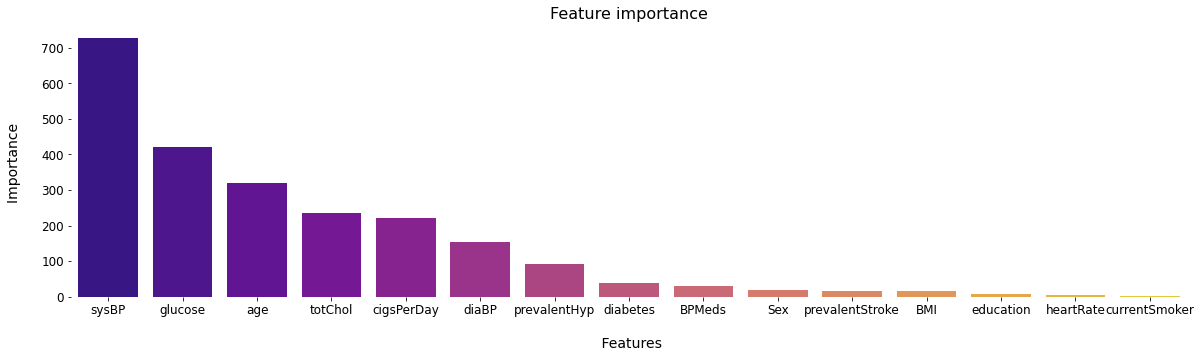

In [ ]:
#Plot for visualization of feature importance

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "plasma")
plt.box(False)

plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## ***Observations***

The three most important features are **sysBP, glucose and age** in the data.

Selecting **11 most impactful features** for predicting heart disease.

In [ ]:
# selecting the 11 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:11]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'Sex',
 'prevalentStroke']

## ***In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***


These features which have **strongest relationship** with the output variable are:

1. Systolic Blood Pressure
2. Glucose
3. Age
4. Cholesterin
5. Cigarettes per Day
6. Diastolic Blood Pressure
7. Hypertensive
8. Diabetes
9. Blood Pressure Medication
10. Sex
11. prevalentStroke

##***New Dataframe with selected features***



In [ ]:
df_heart = scale_heart[['Sex','age','cigsPerDay','prevalentHyp','prevalentStroke','totChol','diabetes','sysBP','diaBP','BPMeds','glucose','TenYearCHD']]
df_heart

Sex       age  cigsPerDay  ...  BPMeds  glucose  TenYearCHD
0       1  0.184211    0.149406  ...       0        0           0
1       0  0.368421    0.242784  ...       0        0           0
2       1  0.421053    0.234295  ...       0        1           0
3       0  0.763158    0.200340  ...       0        1           1
4       0  0.368421    0.302207  ...       0        1           0
...   ...       ...         ...  ...     ...      ...         ...
4233    1  0.473684    0.349745  ...       0        1           1
4234    1  0.500000    0.169779  ...       0        1           0
4235    0  0.421053    0.239389  ...       0        1           0
4236    0  0.315789    0.174873  ...       0        1           0
4237    0  0.526316    0.275042  ...       0        0           0

[4238 rows x 12 columns]

Empty DataFrame
Columns: [Sex, age, cigsPerDay, prevalentHyp, prevalentStroke, totChol, diabetes, sysBP, diaBP, BPMeds, glucose, TenYearCHD]
Index: []

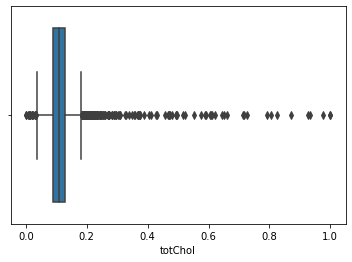

In [ ]:
sns.boxplot(df_heart.totChol)
outliers = df_heart[(df_heart['totChol'] > 500)] 
outliers

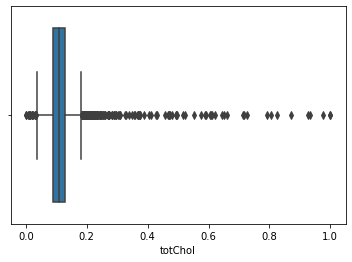

In [ ]:
#Dropping 2 outliers in totChol
df_heart = df_heart.drop(df_heart[df_heart.totChol > 599].index)
sns.boxplot(df_heart.totChol)

## ***Observations:***
There was outliers in total cholesterol level(totChol) and by specifying the range dropped the 2 outliers in total cholesterol level.


## ***Feature Scaling or Normalizing the data***


**Feature scaling** is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as **data normalization** and is generally performed during the data preprocessing step.

In [ ]:
df_heart.columns

Index(['Sex', 'age', 'cigsPerDay', 'prevalentHyp', 'prevalentStroke',
       'totChol', 'diabetes', 'sysBP', 'diaBP', 'BPMeds', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [ ]:
scaled_heart.head()


Sex       age  cigsPerDay  ...  BPMeds   glucose  TenYearCHD
0  1.0  0.184211    0.000000  ...     0.0  0.104520         0.0
1  0.0  0.368421    0.000000  ...     0.0  0.101695         0.0
2  1.0  0.421053    0.285714  ...     0.0  0.084746         0.0
3  0.0  0.763158    0.428571  ...     0.0  0.177966         1.0
4  0.0  0.368421    0.328571  ...     0.0  0.127119         0.0

[5 rows x 12 columns]

## ***Taining and Testing the Data***

In [ ]:
from sklearn.model_selection import train_test_split

y = df_heart['TenYearCHD']
X = df_heart.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
print(len(X_train))
print(len(X_test))

3420
212


## ***Resampling imbalanced Dataset***

A dataset is **imbalanced** if at least one of the classes constitutes only a very small minority. 

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


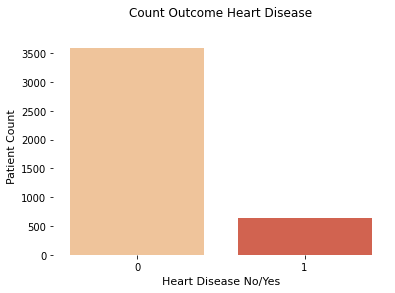

In [ ]:
target_count = heart_df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(heart_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

## ***Methods to resample imbalanced data***



1.   Under-sampling
2.   Over-sampling



## ***Undersampling methods***



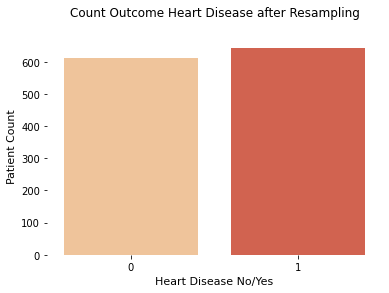

In [ ]:
# Shuffle df
shuffled_df = heart_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=492)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

## ***Models***

The algorithms that we will be used are:

1. Logistic Regression

2. k-Nearest Neighbours

3. Decision Trees

4. Random Forest Classification


## ***1. Logistic Regression***

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_logreg_pred = logreg.predict(X_val)

# Use score method to get accuracy of model
score = logreg.score(X_val, y_val)
print(score)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_val, normalized_df_logreg_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_val, normalized_df_logreg_pred)
print(f"The f1 score for LogisticRegression is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_val, normalized_df_logreg_pred)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_val, normalized_df_logreg_pred)
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")

0.8377483443708609
The accuracy score for LogisticRegression is: 83.8%
The f1 score for LogisticRegression is: 7.5%
The precision score for LogisticRegression is: 50.0%
The recall score for LogisticRegression is: 4.1000000000000005%


## ***Observations:***

The accuracy score for LogisticRegression is: 85.3%

The f1 score for LogisticRegression is: 5.899%

## ***Are any model assumptions violated?***

As there is multicolinerality, it violates the model assumptions in case of logistic regression. 



## ***Polynomail features***



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6) 


X_poly = poly.fit_transform(X_train)

In [ ]:
model = LogisticRegression()
model.fit(X_poly, y_train)

y_train_pred = model.predict(X_poly)

X_val_poly = poly.fit_transform(X_val)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score( y_train, y_train_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")


The accuracy score for LogisticRegression is: 86.4%


In [ ]:
y_val_pred = model.predict(X_val_poly)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score( y_val, y_val_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")



The accuracy score for LogisticRegression is: 83.3%


## ***Regularization***

Since the model is fiting the tarining data but fails on the validation data it is overfitting the training data. To counter this using regularization, two kinds of regularization

Lasso

Ridge

Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso

X_poly_train = poly.fit_transform(X_train)
reg = Lasso(alpha=0.5)
reg.fit(X_poly_train, y_train)


X_poly_val = poly.fit_transform(X_val)

y_train_pred = reg.predict(X_poly_train)
y_val_pred = reg.predict(X_poly_val)

acc = accuracy_score(y_train,y_train_pred)
print(f"The accuracy score for LogisticRegression on training data is: {round(acc,3)*100}%")

acc = accuracy_score(y_train,y_train_pred)
print(f"The accuracy score for LogisticRegression on training data is: {round(acc,3)*100}%")




ValueError: ignored

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_poly_train, y_train)
predictions = clf.predict(X_poly_train)
score(X_poly_train, y_train)



TypeError: ignored

In [ ]:
print(clf.coef_)
print(clf.intercept_)

[0. 0. 0. ... 0. 0. 0.]
0.1516656925774401


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
Ridge()

## ***2. KNN (k-nearest neighbors)***

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 86.3%
The f1 score for KNN is: 0.0%
The precision score for KNN is: 0.0%
The recall score for KNN is: 0.0%


## ***3. Decision Trees***

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels.

In [ ]:
#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_up_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_up_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_up_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_up_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_up_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 75.9%
The f1 score for DTC is: 23.9%
The precision score for DTC is: 20.0%
The recall score for DTC is: 29.599999999999998%


## ***Random Forest Classification***

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [ ]:
rfc =  RandomForestClassifier()

#fit model
rfc.fit(X_train, y_train)

normalized_df_rfc_pred = rfc.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_rfc_pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_rfc_pred)
print(f"The f1 score for RFC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_rfc_pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_rfc_pred)
print(f"The recall score for RFC is: {round(recall,3)*100}%")

Observations:
The accuracy score for RFC is: 84.39999999999999%
The f1 score for RFC is: 0.0%
The precision score for RFC is: 0.0%
The recall score for RFC is: 0.0%
